In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [83]:
def plot(x, y, x_label="", y_label="", title=""):
    fig, ax = plt.subplots()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    ax.plot(x, y)
    plt.show()

def show(z, x, y, xlabel="", ylabel="", title=""):
    # Get the height and width of the data
    h, w = z.shape

    # Length per pixel.
    lpp_x = np.mean(np.diff(x))
    lpp_y = np.mean(np.diff(y))
    
    # Calculate tick positions and labels
    step_x = w / 8 # Divide by 10 for 10 tick marks
    step_y = h / 8
    x_ticks = np.array([step_x * i for i in range(9)])  # 0 to 10
    y_ticks = np.array([step_y * i for i in range(9)])  # 0 to 10
    
    # Create labels based on tick positions relative to the center of the image
    x_labels = [f'{(tick - w / 2) * lpp_x:.1f}' for tick in x_ticks]
    y_labels = [f'{(tick - h / 2) * lpp_y:.1f}' for tick in y_ticks]
    
    # Display the data using imshow
    plt.imshow(z, cmap='viridis')
    
    # Set custom tick labels for x and y axes
    plt.xticks(ticks=x_ticks.astype(int), labels=x_labels)
    plt.yticks(ticks=y_ticks.astype(int), labels=y_labels)

    plt.colorbar()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.axis('equal')
    plt.show()

def f(z, eps):
    return np.abs(eps / (eps ** 2 + z ** 2))

def get_z(h, w, num_points):
    x = np.linspace(-w/2, w/2, num_points)
    y = np.linspace(-h/2, h/2, num_points)
    xg, yg = np.meshgrid(x, y)
    z = xg + 1j * yg
    return z, x, y

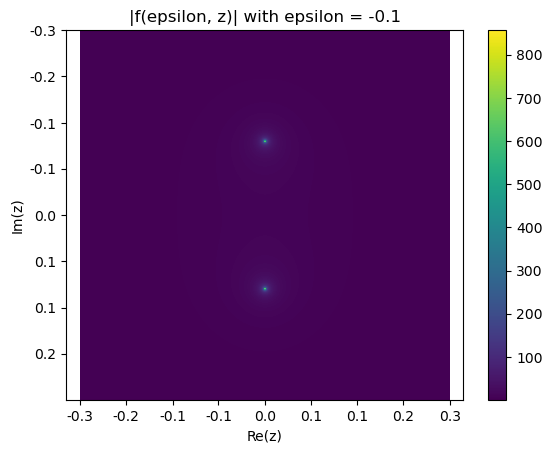

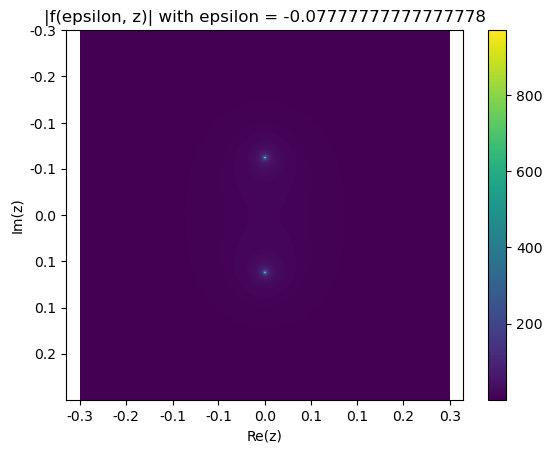

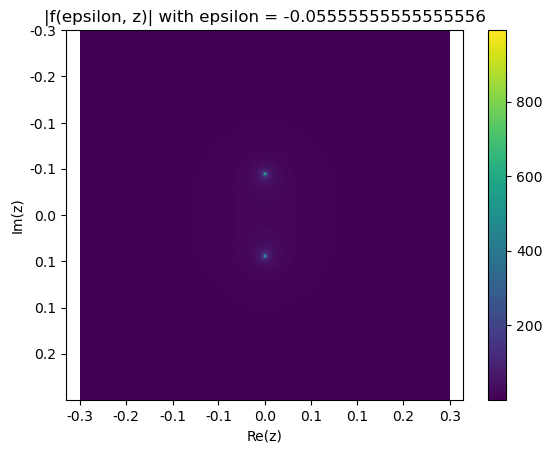

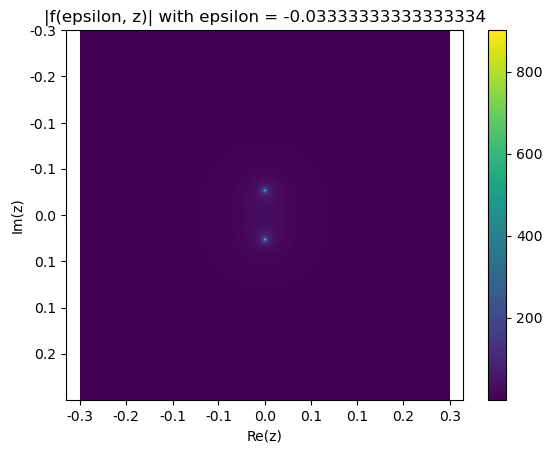

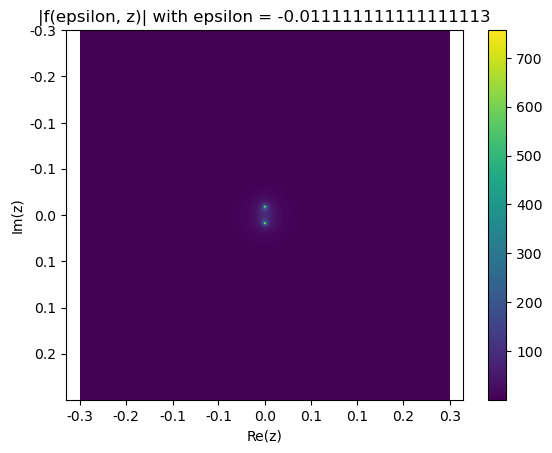

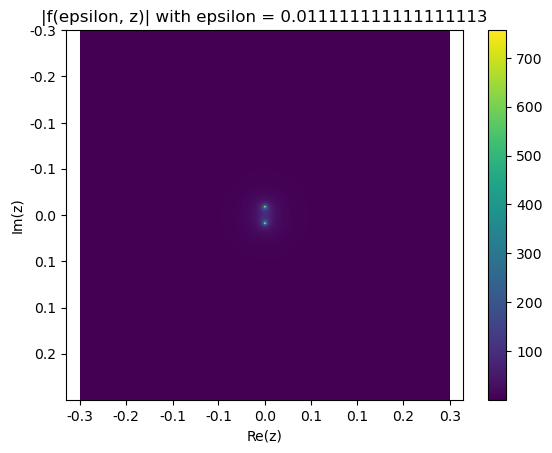

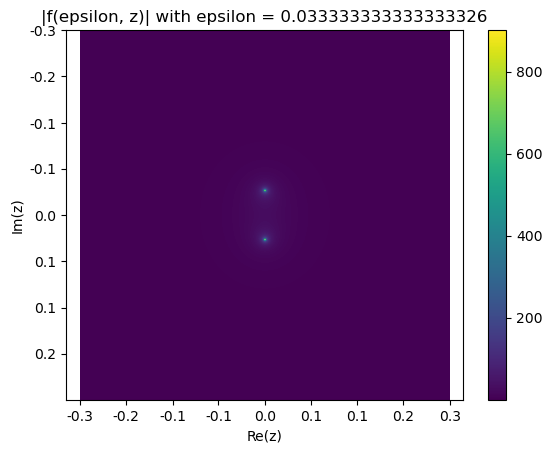

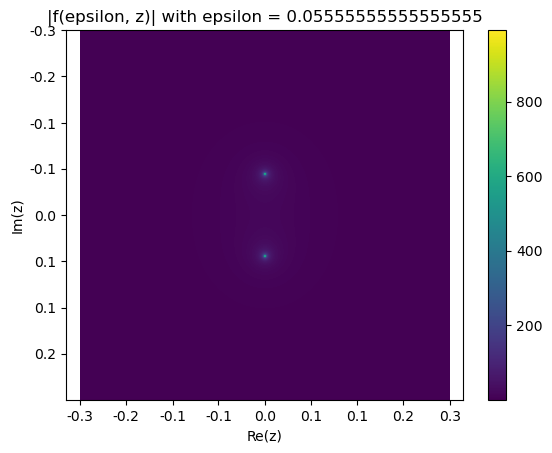

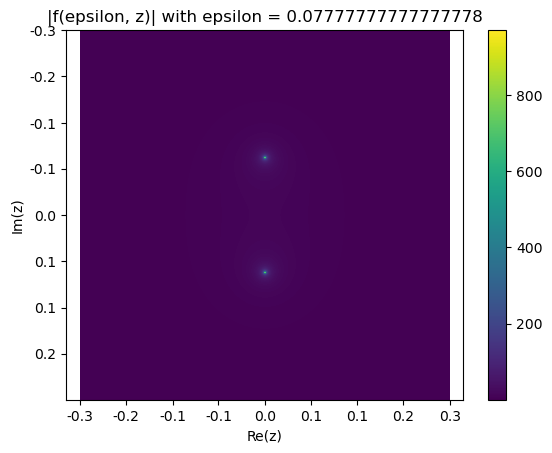

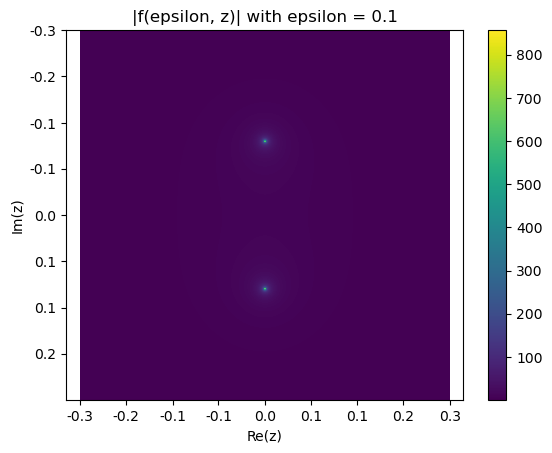

In [84]:
n = 10
eps = np.linspace(-0.1, 0.1, n)
z, x, y = get_z(0.5, 0.5, 500)

# Plot all the functions.
for ep in eps:
    f_z = f(z, ep)
    show(f_z, x, y, xlabel="Re(z)", ylabel="Im(z)", title="|f(epsilon, z)| with epsilon = " + str(ep))

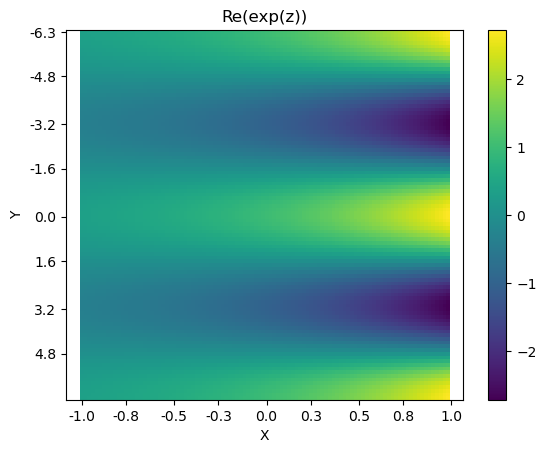

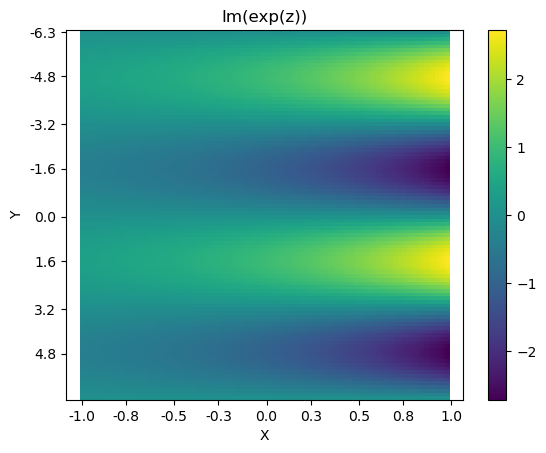

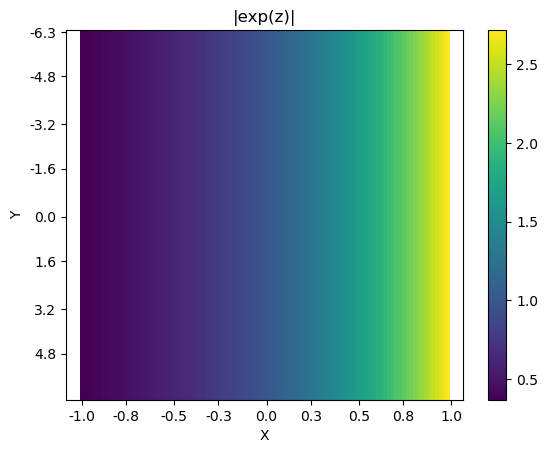

In [89]:
k = 100
x = np.linspace(-1, 1, k)
y = np.linspace(-2*np.pi, 2*np.pi, k)
xg, yg = np.meshgrid(x, y)
real_part = np.exp(xg) * np.cos(yg)
imag_part = np.exp(xg) * np.sin(yg)
modulus = np.sqrt(real_part ** 2 + imag_part ** 2)

show(real_part, x, y, xlabel="X", ylabel="Y", title="Re(exp(z))")
show(imag_part, x, y, xlabel="X", ylabel="Y", title="Im(exp(z))")
show(modulus, x, y, xlabel="X", ylabel="Y", title="|exp(z)|")

In [110]:
def plot_3d_scatter(x, y, z, colors, cmap='viridis', elev=30, azim=22.5):
    """
    Create a 3D scatter plot.

    Parameters:
    - x: Array-like, x coordinates of the points.
    - y: Array-like, y coordinates of the points.
    - z: Array-like, z coordinates of the points.
    - colors: Array-like, color parameter for each point.
    - cmap: Colormap for the scatter plot (default is 'viridis').
    """
    
    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot with color based on the `colors` vector
    scatter = ax.scatter(x, y, z, c=colors, cmap=cmap, marker='o')
    
    # Add color bar to indicate the value of the color parameter
    cbar = plt.colorbar(scatter)
    cbar.set_label('Phase Angle')

    # Set labels
    ax.set_xlabel('Re(z)')
    ax.set_ylabel('Im(z)')
    ax.set_zlabel('|Z|')

    # Set viewing angle
    ax.view_init(elev=elev, azim=azim)

    plt.tight_layout()

    # Show plot
    plt.show()

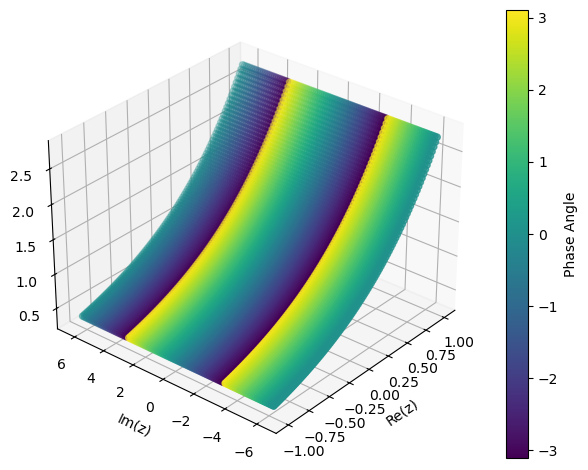

In [126]:
xl = xg.flatten()
yl = yg.flatten()
zl = modulus.flatten()
phase = np.arctan2(imag_part, real_part)
plot_3d_scatter(xl, yl, zl, phase, azim=220)